# Practice Case 04 - Machine Learning

Done and analyzed by: *__Mike Bratanata__*

All the task below will be answered using the given dataset which is provided in the e-Learning System
Dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018
Data consist of information of flight such as:
1. Date of flight
2. Date of arrival
3. Departure Delay
4. Tail Number
5. Airline Name
6. Departure Location
7. Arrival Location
8. Flight Number
9. Delay

You can add any outsource data to help your task, but you need to put the source of the data in the
glossary

There are 3 models that you have to make:
1. Linear Regression
2. Logistic Regression
3. 1 Supervised model you choose

Task
1. Provide travel recommendation to passenger (best time to take a flight or best airline), so they will
not get caught in delay. Each recommendation has to be supported by at least 1 graph
2. Create a model to estimate the delay duration ( Linear Regression )
3. Create a model to predict delay > 60 min ( Logistic regression and another supervised model you
choosing )
4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each
feature you created
5. Using those models predict delay that will happened in December for delay >60

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
my_train = pd.read_csv('D:/Data Science Bootcamp/Day 11/data/train_dataset.csv')

In [3]:
my_test = pd.read_csv('D:/Data Science Bootcamp/Day 11/data/test_dataset.csv')

# Exploratory Data Analysis

In [4]:
my_train.shape

(111068, 26)

In [5]:
my_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [6]:
my_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

The dataset has only 2 numerical variables (including id variable) and the rests are categorical.

### Remove ID variable

In [7]:
my_train.drop(['id'], inplace = True, axis=1)

In [8]:
my_train.dtypes

number                        object
airline                       object
airline_name                  object
scheduled_departure_time      object
scheduled_arrival_time        object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
dtype: object

### Duplicate Checking

In [9]:
my_train[my_train.duplicated()]

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
342,MH5727,MH,Malaysia Airlines,2018-10-06 04:00:00,2018-10-06 05:00:00,Kuala Lumpur,KUL,MY,C15,Kuala Lumpur International Airport,...,SG,NaN,Changi International Airport,Asia,2,Asia/Singapore,738,Boeing 737-800 Passenger,1h,22
343,NZ3549,NZ,Air New Zealand,2018-10-06 04:00:00,2018-10-06 05:00:00,Kuala Lumpur,KUL,MY,C15,Kuala Lumpur International Airport,...,SG,NaN,Changi International Airport,Asia,2,Asia/Singapore,738,Boeing 737-800 Passenger,1h,22
344,SQ5425,SQ,Singapore Airlines,2018-10-06 04:00:00,2018-10-06 05:00:00,Kuala Lumpur,KUL,MY,C15,Kuala Lumpur International Airport,...,SG,NaN,Changi International Airport,Asia,2,Asia/Singapore,738,Boeing 737-800 Passenger,1h,22
345,VA5853,VA,Virgin Australia,2018-10-06 04:00:00,2018-10-06 05:00:00,Kuala Lumpur,KUL,MY,C15,Kuala Lumpur International Airport,...,SG,NaN,Changi International Airport,Asia,2,Asia/Singapore,738,Boeing 737-800 Passenger,1h,22
346,MI325,MI,SilkAir,2018-10-06 04:00:00,2018-10-06 05:00:00,Kuala Lumpur,KUL,MY,C15,Kuala Lumpur International Airport,...,SG,NaN,Changi International Airport,Asia,2,Asia/Singapore,738,Boeing 737-800 Passenger,1h,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111036,AK5414,AK,AirAsia,2018-11-30 22:00:00,2018-11-30 23:25:00,Johor Bharu,JHB,MY,NaN,Senai Airport,...,MY,NaN,Kuching International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 25m,0
111037,AK6047,AK,AirAsia,2018-11-30 22:00:00,2018-11-30 22:45:00,Johor Bharu,JHB,MY,NaN,Senai Airport,...,MY,NaN,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,44m,0
111044,AK1490,AK,AirAsia,2018-11-30 23:00:00,2018-12-01 01:00:00,Johor Bharu,JHB,MY,NaN,Senai Airport,...,VN,NaN,Tan Son Nhat International Airport,Asia,2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,1h 49m,0
111049,MXD1215,MXD,Malindo Air,2018-11-30 23:00:00,2018-12-01 00:00:00,Kuala Lumpur,SZB,MY,NaN,Sultan Abdul Aziz Shah Airport,...,MY,NaN,Senai Airport,Asia,NaN,Asia/Kuala_Lumpur,AT7,ATR 72,1h,0


In [10]:
# There are 7,551 rows of duplicated data, so we are going to remove it.
my_train = my_train.drop_duplicates()

In [11]:
my_train.shape

(103517, 25)

### Null Checking

In [12]:
my_train.isnull().sum()

number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            4
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        41017
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    38530
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          92124
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      53334
arrival_airport_timezone          0
flight_equipment_iata            18
flight_equipment_name            18
flight_duration                   2
delay                             0
dtype: int64

### Remove missing values using _forward-fill_ method
Forward-fill is to fill the missing values using the previous-filled value.

In [13]:
my_train = my_train.fillna(method='ffill')

In [14]:
my_train.isnull().sum()

number                        0
airline                       0
airline_name                  0
scheduled_departure_time      0
scheduled_arrival_time        0
departure_airport_city        0
departure_airport_code        0
departure_airport_country     0
departure_airport_gate        0
departure_airport_name        0
departure_airport_region      0
departure_airport_terminal    0
departure_airport_timezone    0
arrival_airport_city          0
arrival_airport_code          0
arrival_airport_country       0
arrival_airport_gate          0
arrival_airport_name          0
arrival_airport_region        0
arrival_airport_terminal      1
arrival_airport_timezone      0
flight_equipment_iata         0
flight_equipment_name         0
flight_duration               0
delay                         0
dtype: int64

### Change data type of _scheduled_departure_time_ and _scheduled_arrival_time_ to datetime

In [15]:
my_train['scheduled_departure_time'] = pd.to_datetime(my_train['scheduled_departure_time'], format='%Y-%m-%d')
my_train['scheduled_arrival_time'] = pd.to_datetime(my_train['scheduled_arrival_time'], format='%Y-%m-%d')

In [16]:
my_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103517 entries, 0 to 111067
Data columns (total 25 columns):
number                        103517 non-null object
airline                       103517 non-null object
airline_name                  103517 non-null object
scheduled_departure_time      103517 non-null datetime64[ns]
scheduled_arrival_time        103517 non-null datetime64[ns]
departure_airport_city        103517 non-null object
departure_airport_code        103517 non-null object
departure_airport_country     103517 non-null object
departure_airport_gate        103517 non-null object
departure_airport_name        103517 non-null object
departure_airport_region      103517 non-null object
departure_airport_terminal    103517 non-null object
departure_airport_timezone    103517 non-null object
arrival_airport_city          103517 non-null object
arrival_airport_code          103517 non-null object
arrival_airport_country       103517 non-null object
arrival_airport_gate     

# Feature Engineering

### Separate the departure time and arrival time into hour and day

Feature Engineering for variables below are important cause we got to see the characteristic for each day and hour. Therefore, I had to split the scheduled_departure_time and schedule_arrival_time to two new variables: hour and day.

In [17]:
my_train['departure_hour'] = my_train.scheduled_departure_time.apply(lambda x: x.hour)
my_train['departure_day'] = my_train.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
my_train['arival_hour'] = my_train.scheduled_arrival_time.apply(lambda x: x.hour)
my_train['arrival_day'] = my_train.scheduled_arrival_time.apply(lambda x: x.strftime('%A'))
my_train = my_train.drop(columns=['scheduled_departure_time','scheduled_arrival_time'])
my_train.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,departure_hour,departure_day,arival_hour,arrival_day
0,AK6430,AK,AirAsia,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,...,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,22,Friday,23,Friday
1,ID*7164,ID*,Batik Air,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,...,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,22,Friday,23,Friday
2,MXD9116,MXD,Malindo Air,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,...,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,22,Friday,23,Friday
3,AK5198,AK,AirAsia,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,...,2,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,22,Friday,1,Saturday
4,AK516,AK,AirAsia,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,...,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,22,Friday,1,Saturday


#### Top 10 Airlines with Delay

In [18]:
vis1 = my_train.groupby('airline_name').mean().sort_values('delay', ascending=False)[0:10]

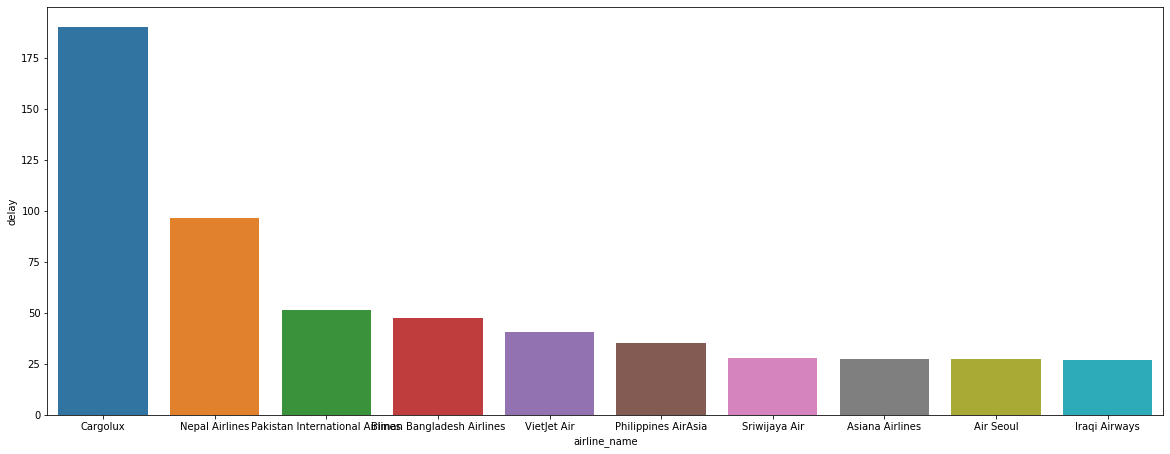

In [19]:
plt.figure(figsize=(20,7.5))
sns.barplot(vis1.index, vis1['delay'])

#### Top 10 Airlines without Delay

In [20]:
vis1a = my_train.groupby('airline_name').mean().sort_values('delay', ascending=True)[0:10]

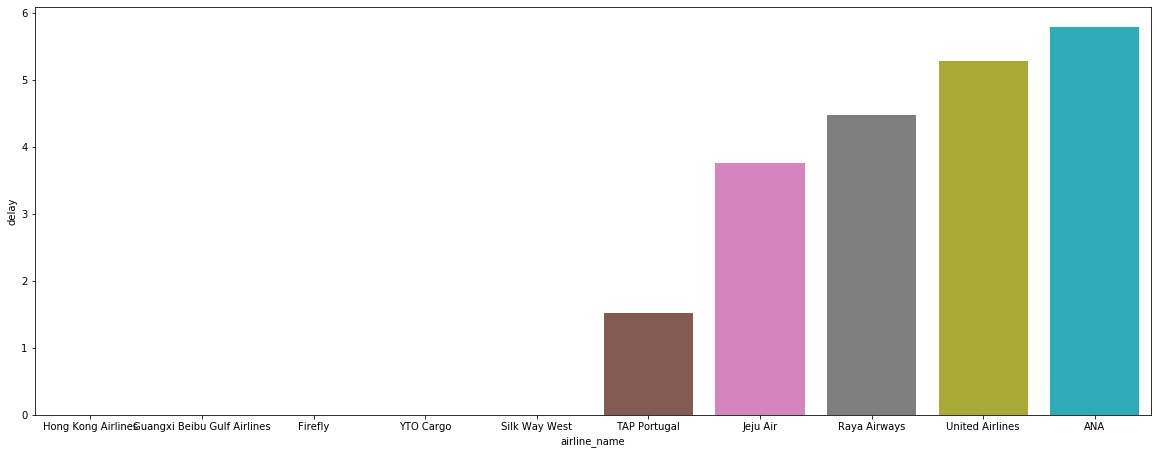

In [21]:
plt.figure(figsize=(20,7.5))
sns.barplot(vis1a.index, vis1a['delay'])

#### The Most Frequent Day with Delay

In [22]:
vis2 = my_train.groupby('departure_day').mean().sort_values('delay', ascending=False)

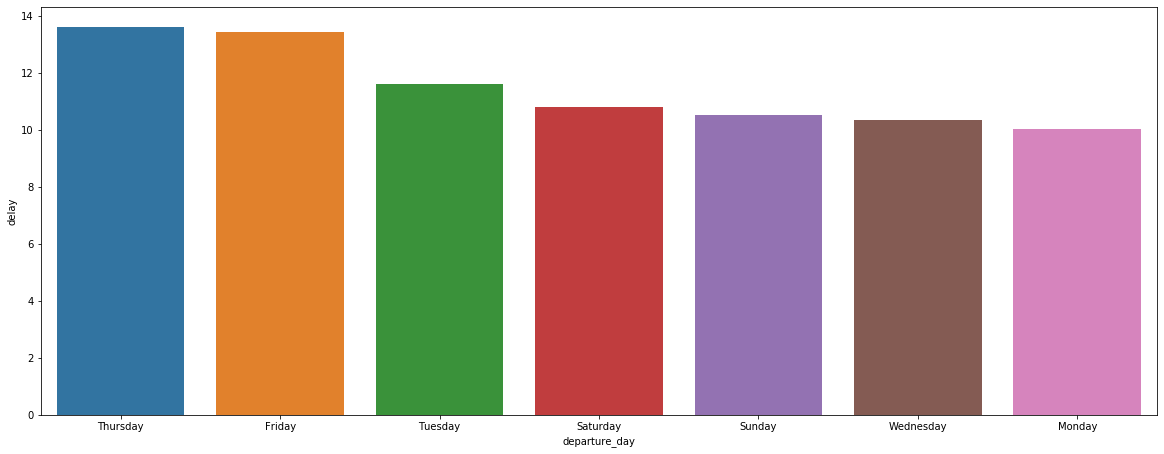

In [23]:
plt.figure(figsize=(20,7.5))
sns.barplot(vis2.index, vis2['delay'])

#### The Most Frequent Time (hour) for Delay

In [24]:
vis3 = my_train.groupby('departure_hour').mean().sort_values('delay')

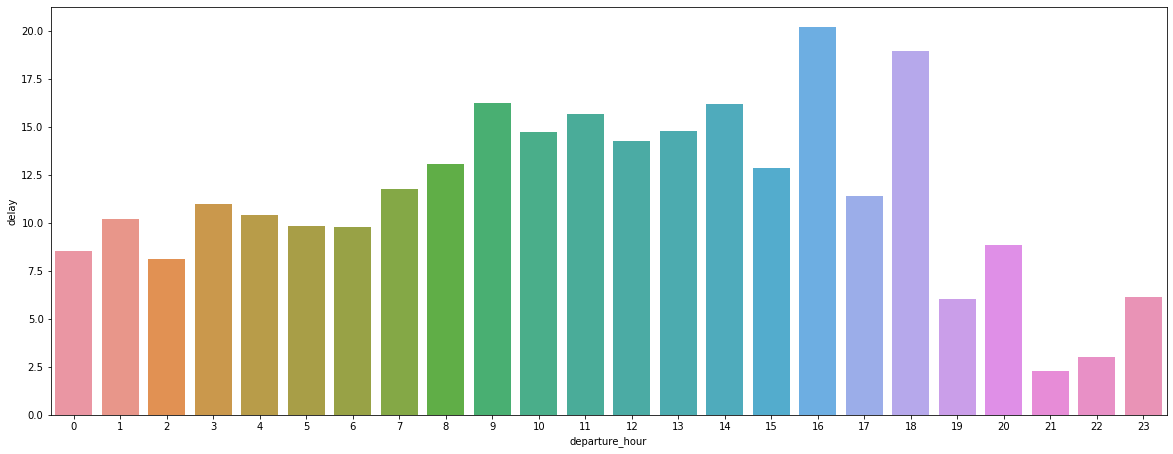

In [25]:
plt.figure(figsize=(20,7.5))
sns.barplot(vis3.index, vis3['delay'])

# Travel Recommendation

Here is the Travel Recommendation Summary for passengers in choosing the best and recommended airlines:
1. As you may know that Cargolux Airlines has the highest number of delay, passengers now know that they can avoid Cargolux as their preferred airlines in the future. However, passengers can choose Hong Kong Airlines, Guangxi Beibu, Gulf Airlines, Firefly, YTE Cargo as airlines with no delay.
2. If possible, avoid Thursday as it is the worst day to travel due to delay conditions. Pick Monday with the least delay.
3. Book a flight at night time (9 pm is the best time with the least delay) and avoid peak hour at 4 pm or 6 pm.

### Separate the object variables from int variables, so the object variables can be label encoded

This separation between object type and int is very crucial prior to label encoding. If I don't separate the two data types, I will not be able to do label encoding. Therefore, this process had to be done.

In [26]:
my_train.dtypes

number                        object
airline                       object
airline_name                  object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
departure_hour                 int64
departure_day                 object
arival_hour                    int64
arrival_day                   object
d

In [27]:
obj_my_train = my_train.select_dtypes(include=['object']).copy()
obj_my_train.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,AK6430,AK,AirAsia,Kuala Lumpur,KUL,MY,J15,Kuala Lumpur International Airport,Asia,2,...,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,Friday,Friday
1,ID*7164,ID*,Batik Air,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,...,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,Friday,Friday
2,MXD9116,MXD,Malindo Air,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,Asia,M,...,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,Friday,Friday
3,AK5198,AK,AirAsia,Kuala Lumpur,KUL,MY,J9,Kuala Lumpur International Airport,Asia,2,...,INT,Sandakan Airport,Asia,2,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,Friday,Saturday
4,AK516,AK,AirAsia,Kuala Lumpur,KUL,MY,P1,Kuala Lumpur International Airport,Asia,2,...,INT,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,Friday,Saturday


In [28]:
int_my_train = my_train.select_dtypes(include=['int64']).copy()
int_my_train.head()

,delay,departure_hour,arival_hour
0,2,22,23
1,8,22,23
2,8,22,23
3,0,22,1
4,0,22,1


In [29]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
obj_my_train_mod = obj_my_train.astype(str).apply(le.fit_transform)
obj_my_train_mod.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,494,13,11,4,6,0,103,2,0,1,...,56,128,0,17,13,6,5,407,0,0
1,1169,45,18,4,6,0,78,2,0,3,...,138,121,0,1,9,6,5,178,0,0
2,2060,65,62,4,6,0,78,2,0,3,...,138,121,0,1,9,6,5,178,0,0
3,233,13,11,4,6,0,115,2,0,1,...,249,111,0,1,13,6,5,248,0,2
4,226,13,11,4,6,0,146,2,0,1,...,249,103,0,15,7,6,5,277,0,2


In [30]:
my_train_final = pd.concat([int_my_train, obj_my_train_mod], axis=1)
my_train_final.head()

,delay,departure_hour,arival_hour,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,2,22,23,494,13,11,4,6,0,103,...,56,128,0,17,13,6,5,407,0,0
1,8,22,23,1169,45,18,4,6,0,78,...,138,121,0,1,9,6,5,178,0,0
2,8,22,23,2060,65,62,4,6,0,78,...,138,121,0,1,9,6,5,178,0,0
3,0,22,1,233,13,11,4,6,0,115,...,249,111,0,1,13,6,5,248,0,2
4,0,22,1,226,13,11,4,6,0,146,...,249,103,0,15,7,6,5,277,0,2


# Exploratory Data Analysis (Test)

In [31]:
my_test.shape

(41557, 26)

In [32]:
my_test.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27
3,483247,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,...,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
4,483248,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20


In [33]:
my_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 26 columns):
id                            41557 non-null int64
number                        41557 non-null object
airline                       41557 non-null object
airline_name                  41557 non-null object
scheduled_departure_time      41557 non-null object
scheduled_arrival_time        41555 non-null object
departure_airport_city        41557 non-null object
departure_airport_code        41557 non-null object
departure_airport_country     41557 non-null object
departure_airport_gate        25147 non-null object
departure_airport_name        41557 non-null object
departure_airport_region      41557 non-null object
departure_airport_terminal    26309 non-null object
departure_airport_timezone    41557 non-null object
arrival_airport_city          41557 non-null object
arrival_airport_code          41557 non-null object
arrival_airport_country       41557 non-null object
arrival_

The dataset has only 2 numerical variables (including id variable) and the rests are categorical.

### Remove ID variable

In [34]:
my_test.drop(['id'], inplace = True, axis=1)

In [35]:
my_test.dtypes

number                        object
airline                       object
airline_name                  object
scheduled_departure_time      object
scheduled_arrival_time        object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
dtype: object

### Duplicate Checking

In [36]:
my_test[my_test.duplicated()]

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
9,D7501,D7,AirAsia X,2018-12-01 00:00:00,2018-12-01 06:00:00,Kuala Lumpur,KUL,MY,P6,Kuala Lumpur International Airport,...,KR,15,Jeju International Airport,Asia,NaN,Asia/Seoul,333,Airbus A330-300,6h,16
10,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
11,AC6257,AC,Air Canada,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20
12,UA7967,UA,United Airlines,2018-12-01 00:00:00,2018-12-01 06:40:00,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,...,JP,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20
13,AK6324,AK,AirAsia,2018-12-01 00:00:00,2018-12-01 01:05:00,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,...,MY,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41552,MXD177,MXD,Malindo Air,2018-12-20 08:50:00,2018-12-20 12:00:00,Kuala Lumpur,KUL,MY,C35,Kuala Lumpur International Airport,...,ID,NaN,Ngurah Rai International Airport,Asia,NaN,Asia/Makassar,738,Boeing 737-800 Passenger,3h 10m,19
41553,ID*6018,ID*,Batik Air,2018-12-20 12:45:00,2018-12-20 16:40:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,...,IN,NaN,Chennai Airport,Asia,NaN,Asia/Kolkata,739,Boeing 737-900 Passenger,3h 55m,43
41554,MXD9112,MXD,Malindo Air,2018-12-20 12:45:00,2018-12-20 16:40:00,Kuala Lumpur,KUL,MY,C33,Kuala Lumpur International Airport,...,IN,NaN,Chennai Airport,Asia,NaN,Asia/Kolkata,739,Boeing 737-900 Passenger,3h 55m,43
41555,RJ181,RJ,Royal Jordanian,2018-12-19 14:20:00,2018-12-19 16:20:00,Kuala Lumpur,KUL,MY,C2,Kuala Lumpur International Airport,...,TH,NaN,Suvarnabhumi Airport,Asia,NaN,Asia/Bangkok,788,Boeing 787-8,2h 14m,2


In [37]:
# There are 4,157 rows of duplicated data, so we are going to remove it.
my_test = my_test.drop_duplicates()

In [38]:
my_test.shape

(37400, 25)

### Null Checking

In [39]:
my_test.isnull().sum()

number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            1
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        14691
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    13707
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          34376
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      18861
arrival_airport_timezone          0
flight_equipment_iata             2
flight_equipment_name             2
flight_duration                   1
delay                             0
dtype: int64

### Remove missing values using _forward-fill_ method
Forward-fill is to fill the missing values using the previous-filled value.

In [40]:
my_test = my_test.fillna(method='ffill')

In [41]:
my_test.isnull().sum()

number                        0
airline                       0
airline_name                  0
scheduled_departure_time      0
scheduled_arrival_time        0
departure_airport_city        0
departure_airport_code        0
departure_airport_country     0
departure_airport_gate        0
departure_airport_name        0
departure_airport_region      0
departure_airport_terminal    0
departure_airport_timezone    0
arrival_airport_city          0
arrival_airport_code          0
arrival_airport_country       0
arrival_airport_gate          4
arrival_airport_name          0
arrival_airport_region        0
arrival_airport_terminal      4
arrival_airport_timezone      0
flight_equipment_iata         0
flight_equipment_name         0
flight_duration               0
delay                         0
dtype: int64

### Change data type of _scheduled_departure_time_ and _scheduled_arrival_time_ to datetime

In [42]:
my_test['scheduled_departure_time'] = pd.to_datetime(my_test['scheduled_departure_time'], format='%Y-%m-%d')
my_test['scheduled_arrival_time'] = pd.to_datetime(my_test['scheduled_arrival_time'], format='%Y-%m-%d')

In [43]:
my_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37400 entries, 0 to 41546
Data columns (total 25 columns):
number                        37400 non-null object
airline                       37400 non-null object
airline_name                  37400 non-null object
scheduled_departure_time      37400 non-null datetime64[ns]
scheduled_arrival_time        37400 non-null datetime64[ns]
departure_airport_city        37400 non-null object
departure_airport_code        37400 non-null object
departure_airport_country     37400 non-null object
departure_airport_gate        37400 non-null object
departure_airport_name        37400 non-null object
departure_airport_region      37400 non-null object
departure_airport_terminal    37400 non-null object
departure_airport_timezone    37400 non-null object
arrival_airport_city          37400 non-null object
arrival_airport_code          37400 non-null object
arrival_airport_country       37400 non-null object
arrival_airport_gate          37396 non-nul

# Feature Engineering (Test)

### Separate the departure time and arrival time into hour and day

Feature Engineering for variables below are important cause we got to see the characteristic for each day and hour. Therefore, I had to split the scheduled_departure_time and schedule_arrival_time to two new variables: hour and day.

In [44]:
my_test['departure_hour'] = my_test.scheduled_departure_time.apply(lambda x: x.hour)
my_test['departure_day'] = my_test.scheduled_departure_time.apply(lambda x: x.strftime('%A'))
my_test['arival_hour'] = my_test.scheduled_arrival_time.apply(lambda x: x.hour)
my_test['arrival_day'] = my_test.scheduled_arrival_time.apply(lambda x: x.strftime('%A'))
my_test = my_test.drop(columns=['scheduled_departure_time','scheduled_arrival_time'])
my_test.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,departure_hour,departure_day,arival_hour,arrival_day
0,CZ7412,CZ,China Southern Airlines,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,...,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0,Saturday,4,Saturday
1,MH5712,MH,Malaysia Airlines,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,...,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15,0,Saturday,4,Saturday
2,TK8186,TK,Turkish Airlines,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,...,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27,0,Saturday,2,Saturday
3,AK6324,AK,AirAsia,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,...,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,95,0,Saturday,1,Saturday
4,UA7967,UA,United Airlines,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,...,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,20,0,Saturday,6,Saturday


### Separate the object variables from int variables, so the object variables can be label encoded

This separation between object type and int is very crucial prior to label encoding. If I don't separate the two data types, I will not be able to do label encoding. Therefore, this process had to be done.

In [45]:
my_test.dtypes

number                        object
airline                       object
airline_name                  object
departure_airport_city        object
departure_airport_code        object
departure_airport_country     object
departure_airport_gate        object
departure_airport_name        object
departure_airport_region      object
departure_airport_terminal    object
departure_airport_timezone    object
arrival_airport_city          object
arrival_airport_code          object
arrival_airport_country       object
arrival_airport_gate          object
arrival_airport_name          object
arrival_airport_region        object
arrival_airport_terminal      object
arrival_airport_timezone      object
flight_equipment_iata         object
flight_equipment_name         object
flight_duration               object
delay                          int64
departure_hour                 int64
departure_day                 object
arival_hour                    int64
arrival_day                   object
d

In [46]:
obj_my_test = my_test.select_dtypes(include=['object']).copy()
obj_my_test.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,CZ7412,CZ,China Southern Airlines,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,...,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,Saturday,Saturday
1,MH5712,MH,Malaysia Airlines,Kuala Lumpur,KUL,MY,C11,Kuala Lumpur International Airport,Asia,1,...,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,Saturday,Saturday
2,TK8186,TK,Turkish Airlines,Kuala Lumpur,KUL,MY,A4,Kuala Lumpur International Airport,Asia,1,...,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,Saturday,Saturday
3,AK6324,AK,AirAsia,Kuala Lumpur,KUL,MY,J1,Kuala Lumpur International Airport,Asia,2,...,NaN,Langkawi International Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,1h 10m,Saturday,Saturday
4,UA7967,UA,United Airlines,Kuala Lumpur,KUL,MY,C22,Kuala Lumpur International Airport,Asia,1,...,58B,Narita International Airport,Asia,1,Asia/Tokyo,788,Boeing 787-8,6h 23m,Saturday,Saturday


In [47]:
int_my_test = my_test.select_dtypes(include=['int64']).copy()
int_my_test.head()

,delay,departure_hour,arival_hour
0,15,0,4
1,15,0,4
2,27,0,2
3,95,0,1
4,20,0,6


In [48]:
le = preprocessing.LabelEncoder()
obj_my_test_mod = obj_my_test.astype(str).apply(le.fit_transform)
obj_my_test_mod.head()

,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,departure_airport_region,departure_airport_terminal,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,647,26,27,4,6,0,50,2,0,0,...,198,22,0,15,23,19,22,288,2,2
1,1501,58,59,4,6,0,50,2,0,0,...,198,22,0,15,23,19,22,288,2,2
2,2198,84,90,4,6,0,32,2,0,0,...,198,67,0,15,13,19,22,148,2,2
3,432,13,10,4,6,0,87,2,0,1,...,198,75,0,15,13,6,3,45,2,2
4,2217,88,92,4,6,0,59,2,0,0,...,116,98,0,0,28,37,40,394,2,2


In [49]:
my_test_final = pd.concat([int_my_test, obj_my_test_mod], axis=1)
my_test_final.head()

,delay,departure_hour,arival_hour,number,airline,airline_name,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,departure_day,arrival_day
0,15,0,4,647,26,27,4,6,0,50,...,198,22,0,15,23,19,22,288,2,2
1,15,0,4,1501,58,59,4,6,0,50,...,198,22,0,15,23,19,22,288,2,2
2,27,0,2,2198,84,90,4,6,0,32,...,198,67,0,15,13,19,22,148,2,2
3,95,0,1,432,13,10,4,6,0,87,...,198,75,0,15,13,6,3,45,2,2
4,20,0,6,2217,88,92,4,6,0,59,...,116,98,0,0,28,37,40,394,2,2


# Model

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [51]:
X = my_train_final.iloc[:,0:len(my_train_final.columns)-1]
y = my_train_final.iloc[:,len(my_train_final.columns)-1]
X = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Model 1: Linear Regression

In [52]:
linr = LinearRegression(normalize=True)

linr.fit(X_train, y_train)
y_pred = linr.predict(X_test)

In [53]:
linr_mse = mean_squared_error(y_pred,y_test)
print("THe MSE for the Linear Regression Model is: ", linr_mse)

THe MSE for the Linear Regression Model is:  1.8488333029136332


For this final dataset, the MSE for Linear Regression model is 1.849 which is pretty good! The smaller MSE is showing good model.

## Model 2: Logistic Regression

In [54]:
my_train_final['delay_new'] = my_train_final['delay'].apply(lambda x: 1 if x > 60 else 0)
my_test_final['delay_new'] = my_test_final['delay'].apply(lambda x: 1 if x > 60 else 0)
my_train_final.drop(['delay_new'], inplace = True, axis=1)
my_test_final.drop(['delay_new'], inplace = True, axis=1)

In [55]:
X = my_train_final.iloc[:,0:len(my_train_final.columns)-1]
y = my_train_final.iloc[:,len(my_train_final.columns)-1].values.reshape(-1,1)
X = preprocessing.normalize(X)

In [56]:
logr = LogisticRegression()

logr.fit(X, y)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
X_test = my_test_final.iloc[:,0:len(my_test_final.columns)-1]
y_test = my_test_final.iloc[:,len(my_test_final.columns)-1]

In [58]:
y_pred = logr.predict(X_test)

In [59]:
logr_mse = mean_squared_error(y_pred,y_test)
print("THe MSE for the Logistic Regression Model is: ", logr_mse)

THe MSE for the Logistic Regression Model is:  2.924465240641711


For this final dataset, the MSE for Logistic Regression model is 2.924 which is also pretty good! The smaller MSE is showing good model.

# Model 3: Random Forest

In [60]:
rf = RandomForestClassifier()

rf.fit(X, y)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
X_test = my_test_final.iloc[:,0:len(my_test_final.columns)-1]
y_test = my_test_final.iloc[:,len(my_test_final.columns)-1]

In [62]:
y_pred = rf.predict(X_test)

In [63]:
rf_mse = mean_squared_error(y_pred,y_test)
print("THe MSE for the Logistic Regression Model is: ", rf_mse)

THe MSE for the Logistic Regression Model is:  7.34451871657754


For this final dataset, the MSE for Random Forest model is 7.345 which is also pretty good, but compared to Logistic Regression mode, Random Forest is worse.

# All the answers are blended in with the analysis above. Please follow my Jupyter Notebook for the answers.